# Machine Vision Basics for Robotics

In [142]:
import os
import numpy as np
import matplotlib.pylab as plt
from skimage import data
%matplotlib inline

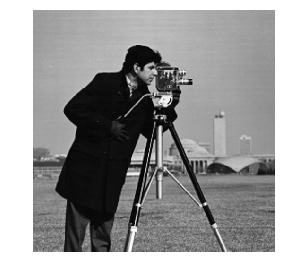

In [143]:
image = data.camera()
plt.figure(figsize=(4,4))
plt.imshow(image, cmap='gray', interpolation='nearest')
plt.axis('off')
plt.tight_layout()

(-0.5, 447.5, 171.5, -0.5)

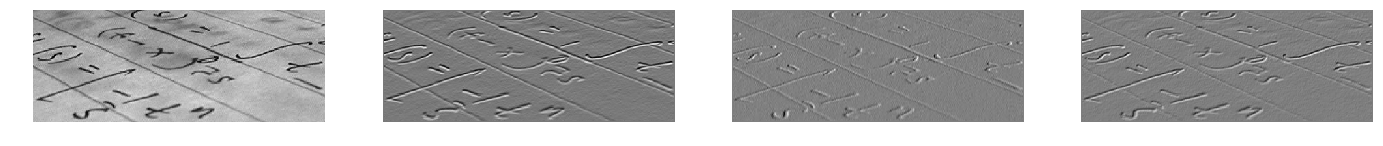

In [221]:
from skimage import filters

text = data.text()
hsobel_text = filters.sobel_h(text)

plt.figure(figsize=(24, 6))
plt.subplot(141)
plt.imshow(text, cmap='gray', interpolation='nearest')
plt.axis('off')

plt.subplot(142)
plt.imshow(hsobel_text, cmap='gray', interpolation='nearest')
plt.axis('off')


'''
We use the following kernel:
  1   0  -1
  2   0  -2
  1   0  -1
'''
vsobel_text = filters.sobel_v(text)
plt.subplot(143)
plt.imshow(vsobel_text, cmap='gray', interpolation='nearest')
plt.axis('off')

plt.subplot(144)
plt.imshow(hsobel_text + vsobel_text, cmap='gray', interpolation='nearest')
plt.axis('off')

# Image Filtering

In [222]:
from scipy import ndimage # image processing of n-dimensional images
from scipy import misc

## Smoothing

In [146]:
smooth_image = ndimage.gaussian_filter(image, sigma=3)

(-0.5, 511.5, 511.5, -0.5)

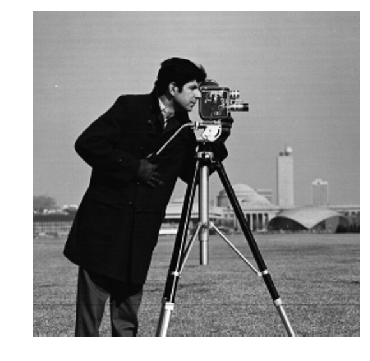

In [147]:
plt.figure(figsize=(6, 6))
plt.imshow(image, cmap='gray', interpolation='nearest')
plt.axis('off')

In [148]:
smooth_image.shape

(512, 512)

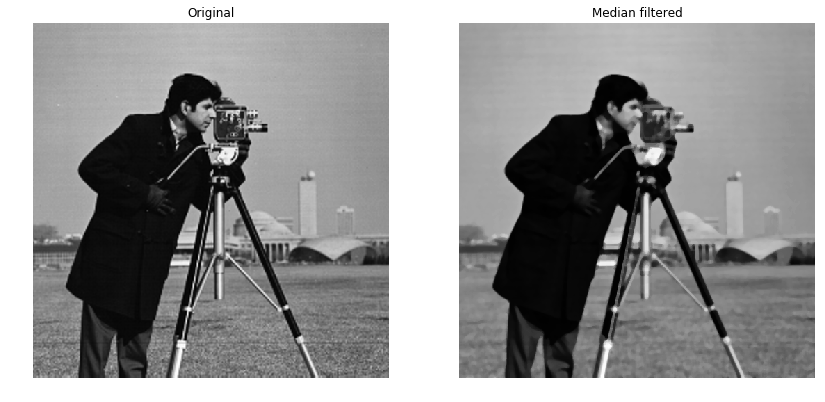

In [224]:
median = ndimage.median_filter(image, 6)

fig = plt.figure(figsize=(14,14))

ax1 = fig.add_subplot(121)  # left side
ax1.imshow(image, cmap='gray', interpolation='nearest')
ax1.set_axis_off()
ax1.set_title("Original")

ax2 = fig.add_subplot(122)  # right side
ax2.imshow(median, cmap='gray', interpolation='nearest')
ax2.set_axis_off()
ax2.set_title("Median filtered")

# Feature Extraction

In [225]:
# first with synthetic data
im = np.zeros((256, 256)) # this function takes a tuple for shape
im[64:-64, 64:-64] = 1 # make a big square
im[96:-96, 0:25] = 1 # make a small rectangle

# add some random noise
noise = np.random.randn(im.shape[0], im.shape[1]) / 2# this function does not
im += noise

In [226]:
im = ndimage.rotate(im, 15, mode='constant')
im = ndimage.gaussian_filter(im, 8)

## Sobel edge detection

In [227]:
sx = ndimage.sobel(im, axis=0, mode='constant')
sy = ndimage.sobel(im, axis=1, mode='constant')
sob = np.hypot(sx, sy)

## Canny edge detection

In [228]:
from skimage.feature import canny
canny_edges = canny(im, sigma=5)

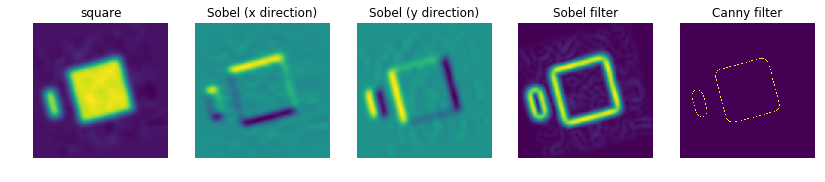

In [229]:
fig = plt.figure(figsize=(14,14))

ax1 = fig.add_subplot(151)  # far left side
ax1.imshow(im)
ax1.set_axis_off()
ax1.set_title("square")

ax2 = fig.add_subplot(152)  # left middle
ax2.imshow(sx)
ax2.set_axis_off()
ax2.set_title("Sobel (x direction)")

ax3 = fig.add_subplot(153)  # right middle
ax3.imshow(sy)
ax3.set_axis_off()
ax3.set_title("Sobel (y direction)")

ax4 = fig.add_subplot(154)  # right middle
ax4.imshow(sob)
ax4.set_axis_off()
ax4.set_title("Sobel filter")

ax5 = fig.add_subplot(155)  # right middle
ax5.imshow(canny_edges)
ax5.set_axis_off()
ax5.set_title("Canny filter")

### Turn up the noise!

In [230]:
# Add MORE noise (we don't Gaussian blur it out this time)
noise = np.random.randn(im.shape[0], im.shape[1]) / 2
im += noise

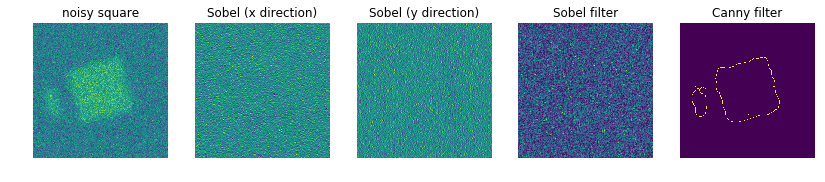

In [231]:
sx = ndimage.sobel(im, axis=0, mode='constant')
sy = ndimage.sobel(im, axis=1, mode='constant')
sob = np.hypot(sx, sy)
canny_edges = canny(im, sigma=5)

fig = plt.figure(figsize=(14,14))

ax1 = fig.add_subplot(151)  # far left side
ax1.imshow(im)
ax1.set_axis_off()
ax1.set_title("noisy square")

ax2 = fig.add_subplot(152)  # left middle
ax2.imshow(sx)
ax2.set_axis_off()
ax2.set_title("Sobel (x direction)")

ax3 = fig.add_subplot(153)  # right middle
ax3.imshow(sy)
ax3.set_axis_off()
ax3.set_title("Sobel (y direction)")

ax4 = fig.add_subplot(154)  # right middle
ax4.imshow(sob)
ax4.set_axis_off()
ax4.set_title("Sobel filter")

ax5 = fig.add_subplot(155)  # right middle
ax5.imshow(canny_edges)
ax5.set_axis_off()
ax5.set_title("Canny filter")

The canny filter performs much better against added noise ...

## Global filtering (Histogram based segmentation)

In [232]:
hist, bin_edges = np.histogram(image, bins=100)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

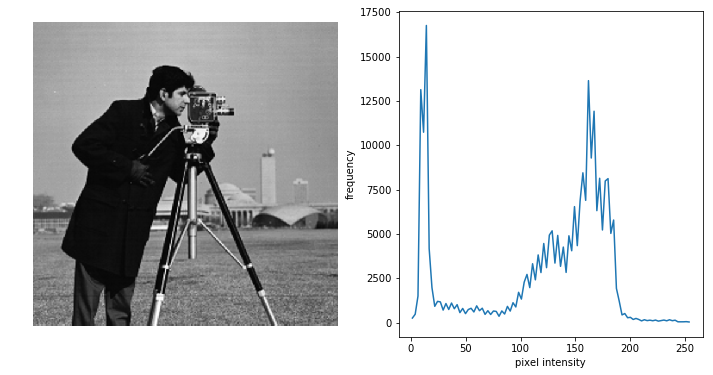

In [236]:
#with plt.xkcd(): # might cause a warning "Humor Sans" not found :)

fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(121)  # left side
ax1.imshow(image, cmap='gray', interpolation='nearest')
ax1.axis('off')

ax2 = fig.add_subplot(122)  # left side
ax2.plot(bin_centers, hist)
plt.xlabel('pixel intensity')
plt.ylabel('frequency')

In [237]:
image_thresh = image.copy() # make a copy so we don't mess up original image
image_thresh[image < 20] = 255
image_thresh[image >= 20] = 0

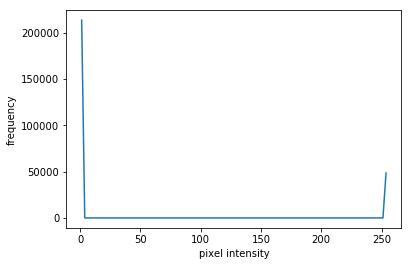

In [238]:
hist, bin_edges = np.histogram(image_thresh, bins=100)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
#with plt.xkcd(): # might cause a warning "Humor Sans" not found :)
plt.plot(bin_centers, hist)
plt.xlabel('pixel intensity')
plt.ylabel('frequency')

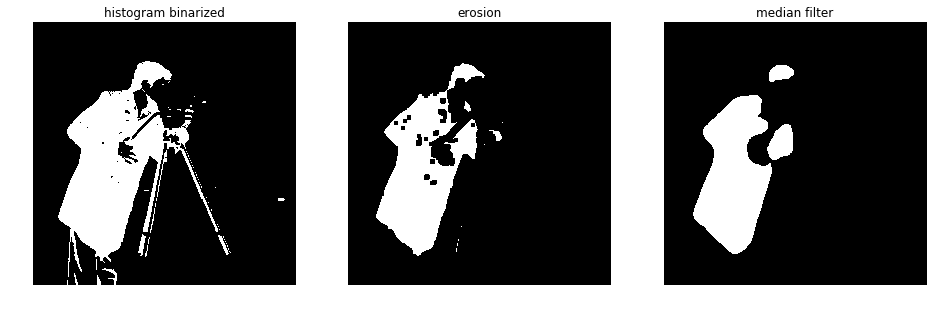

In [239]:
fig = plt.figure(figsize=(16, 16))
ax1 = fig.add_subplot(131)  # left side
ax1.imshow(image_thresh, cmap='gray', interpolation='nearest')
ax1.axis('off')
ax1.set_title('histogram binarized')

integer_mask = image_thresh.copy()

# this will remove structures that are smaller than 8x8 structure
erosion_mask = ndimage.binary_erosion(integer_mask, structure=np.ones((8,8)))

ax2 = fig.add_subplot(132)  # right side
ax2.imshow(erosion_mask, cmap='gray', interpolation='nearest')
ax2.axis('off')
ax2.set_title('erosion')

integer_mask = image_thresh.copy()
median_mask = ndimage.median_filter(erosion_mask, 26)
ax3 = fig.add_subplot(133)  # right side
ax3.imshow(median_mask, cmap='gray', interpolation='nearest')
ax3.axis('off')
ax3.set_title('median filter')

### Histogram Equalization

In [240]:
def plot_img_and_hist(image, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram.

    """
    image = img_as_float(image)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()
    ax_img.set_adjustable('box-forced')

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])

    return ax_img, ax_hist, ax_cdf

In [242]:
from skimage import exposure

# Contrast stretching, stretch to 2nd and 98th percentile of pixel values image can hold
p2, p98 = np.percentile(image, (2, 98))
img_rescale = exposure.rescale_intensity(image, in_range=(p2, p98))

# Equalization
img_eq = exposure.equalize_hist(image)

# Adaptive Equalization
img_adapteq = exposure.equalize_adapthist(image, clip_limit=0.03)

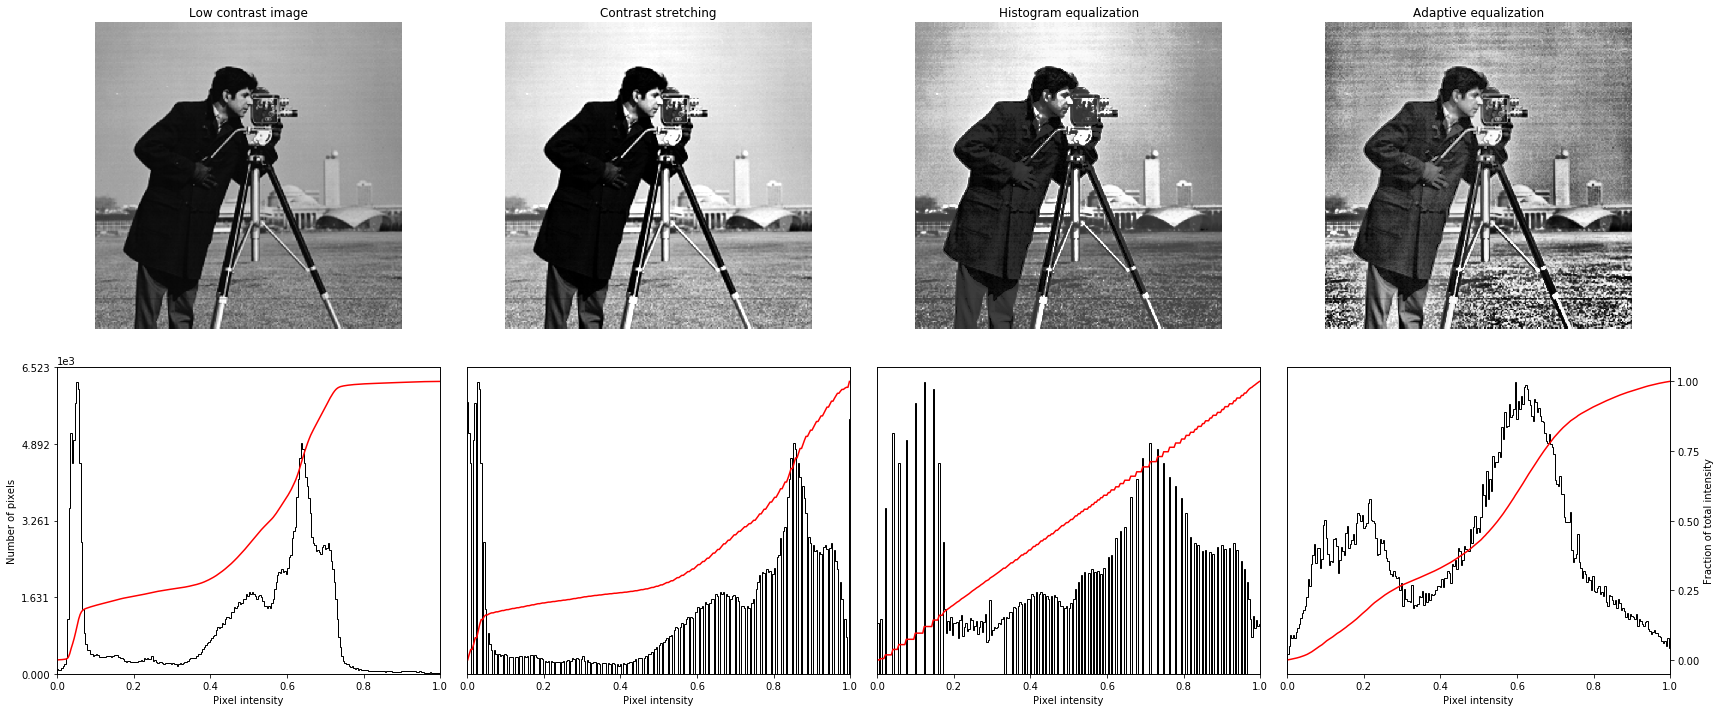

In [243]:
from skimage import img_as_float

# Display results
fig = plt.figure(figsize=(24, 10))
axes = np.zeros((2, 4), dtype=np.object)
axes[0, 0] = fig.add_subplot(2, 4, 1)
for i in range(1, 4):
    axes[0, i] = fig.add_subplot(2, 4, 1+i, sharex=axes[0,0], sharey=axes[0,0])
for i in range(0, 4):
    axes[1, i] = fig.add_subplot(2, 4, 5+i)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(image, axes[:, 0])
ax_img.set_title('Low contrast image')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_rescale, axes[:, 1])
ax_img.set_title('Contrast stretching')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eq, axes[:, 2])
ax_img.set_title('Histogram equalization')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_adapteq, axes[:, 3])
ax_img.set_title('Adaptive equalization')

ax_cdf.set_ylabel('Fraction of total intensity')
ax_cdf.set_yticks(np.linspace(0, 1, 5))

# prevent overlap of y-axis labels
fig.tight_layout()

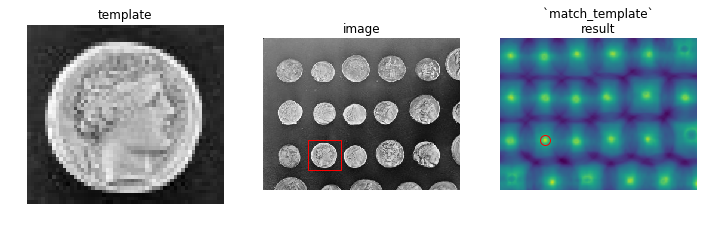

In [170]:
coins = data.coins()
coin_t = coins[170:220, 75:130]

from skimage.feature import match_template
result = match_template(coins, coin_t)
ij = np.unravel_index(np.argmax(result), result.shape)
x, y = ij[::-1]

fig = plt.figure(figsize=(12, 12))
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2, adjustable='box-forced')
ax3 = plt.subplot(1, 3, 3, sharex=ax2, sharey=ax2, adjustable='box-forced')

ax1.imshow(coin_t, cmap=plt.cm.gray)
ax1.set_axis_off()
ax1.set_title('template')

ax2.imshow(coins, cmap=plt.cm.gray)
ax2.set_axis_off()
ax2.set_title('image')
# highlight matched region
hcoin, wcoin = coin.shape
rect = plt.Rectangle((x, y), wcoin, hcoin, edgecolor='r', facecolor='none')
ax2.add_patch(rect)

ax3.imshow(result)
ax3.set_axis_off()
ax3.set_title('`match_template`\nresult')
# highlight matched region
ax3.autoscale(False)
ax3.plot(x, y, 'o', markeredgecolor='r', markerfacecolor='none', markersize=10)

plt.show()

In [179]:
h, w = image.shape

In [217]:
head_t = image[100:160, 210:270]
print('Got template with shape ' + str(head_t.shape))

Got template with shape (60, 60)


In [218]:
result = match_template(image, head_t)
ij = np.unravel_index(np.argmax(result), result.shape)
x, y = ij[::-1]

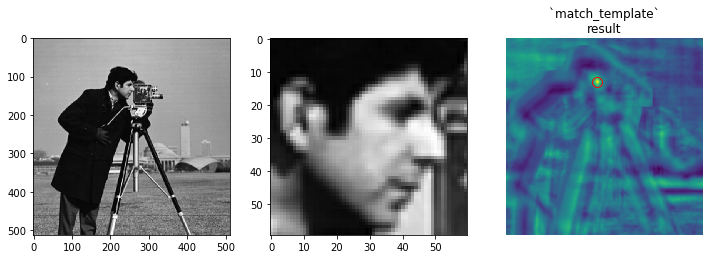

In [220]:
fig = plt.figure(figsize=(12, 12))

ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2)
ax3 = plt.subplot(1, 3, 3)

ax1.imshow(image, cmap='gray')
ax2.imshow(head_t, cmap='gray')

h_t, w_t = head_t.shape
rect = plt.Rectangle((x, y), w_t, h_t, edgecolor='r', facecolor='none')
ax2.add_patch(rect)

ax3.imshow(result)
ax3.set_axis_off()
ax3.set_title('`match_template`\nresult')
# highlight matched region
ax3.autoscale(False)
ax3.plot(x, y, 'o', markeredgecolor='r', markerfacecolor='none', markersize=10)

# Classification

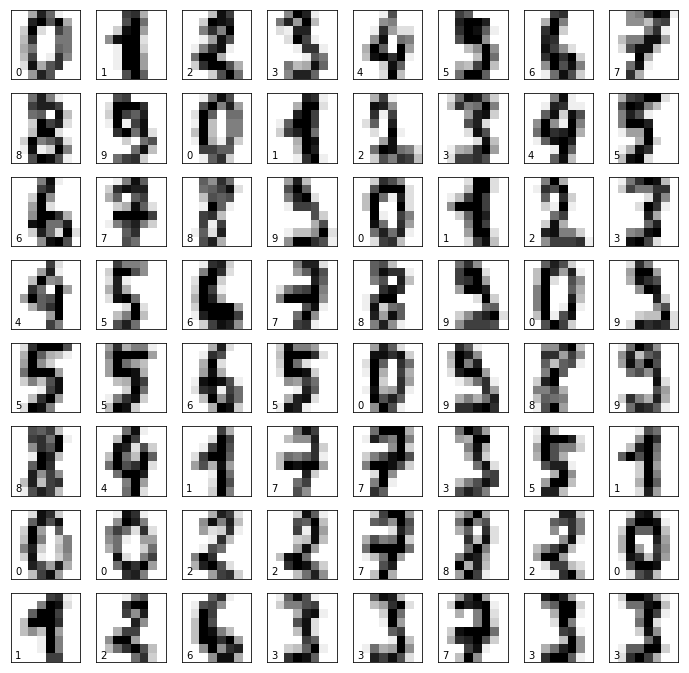

In [244]:
from sklearn.datasets import load_digits
digits = load_digits()

fig = plt.figure(figsize=(12, 12))
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    ax.text(0, 7, str(digits.target[i]))

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

# split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

# train the model
clf = GaussianNB()
clf.fit(X_train, y_train)

# use the model to predict the labels of the test data
predicted = clf.predict(X_test)
expected = y_test

# Plot the prediction
fig = plt.figure(figsize=(12, 12)) # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test.reshape(-1, 8, 8)[i], cmap=plt.cm.binary,
    interpolation='nearest')
    # label the image with the target value
    if predicted[i] == expected[i]:
        ax.text(0, 7, str(predicted[i]), color='green')
    else:
        ax.text(0, 7, str(digits.target[i]), color='red')